In [1]:
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gym_map_bro
import gym_map_bro.src.toy_agents as toy_agents
from gym_map_bro.src.data import *
from gym_map_bro.src.datastore import *

env = gym.make('map-bro-v0')

In [2]:
env_config = {
    "col" : "dns.col",
    "N_batch": 5,										# Number of new lines to try to add to the datastores each epoch
    "batch_stocahsitic": False,							# Whether or not the number of lines in each batch is constant (False) or not (True)
    "name": ['deletion','Hot','Warm','Cold'],			# Names to identify different storage formats
    "ds_size": [10, 20, 40],							# Number of lines in each datastore
    "ds_frac": [1, 0.5, 0.25],							# Value coefficient associated with each storage option
    "val_weight": [np.array([1,1,1]),np.array([1,1,1]),np.array([1,1,1])],								# Weights applied to each value column
    "val_func": linear_val_func,# function for determining total value from various value columns
    "ds_decay": [0.9, 0.95, 0.99],						# Rate at which Value decays in each DataStore
    "vals": [pd.DataFrame(index = np.arange(10),columns=['Age','Key Terrain','Queries']),		# Values associated with each line of data
               pd.DataFrame(index = np.arange(20),columns=['Age','Key Terrain','Queries']),
               pd.DataFrame(index = np.arange(40),columns=['Age','Key Terrain','Queries'])],
    "init_rplan": [np.hstack((np.mgrid[0:10, 1:4][1],np.zeros(10).reshape(-1,1))),
                    np.hstack((np.mgrid[0:20, 1:4][1],np.zeros(20).reshape(-1,1))),
                    np.hstack((np.mgrid[0:40, 1:4][1],np.zeros(40).reshape(-1,1)))], #Initially start with a hot to cold retention plan for data
    "ind": [np.zeros(10),np.zeros(20),np.zeros(40)], #All data is initialized to the first step of it's rplan
    "init_expir": [np.ones((10,3))*20,np.ones((20,3))*20,np.ones((40,3))*20], #Data 20 time steps old must be re-evaluated
    "df": [pd.DataFrame(index = np.arange(10),columns=['Age','Key Terrain','Queries']),		# Dataframes that hold actual datastore contents
           pd.DataFrame(index = np.arange(20),columns=['Age','Key Terrain','Queries']),
           pd.DataFrame(index = np.arange(40),columns=['Age','Key Terrain','Queries'])]
}

In [3]:
env.__myinit__(env_config)
np.random.seed(0)

# Variable initialization for manual looping
loop = 0

# Variables for keeping track of total values over time
vals_plot = [[0],[0],[0]]
t = 0

RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
RANDOM
Hot    Age  Key Terrain  Queries
0  2.0          1.0      1.0
1  2.0          1.0      1.0
2  1.0          1.0      1.0
3  1.0          1.0      1.0
4  1.0          1.0      1.0
5  3.0          1.0      1.0
6  2.0          1.0      1.0
7  2.0          1.0      1.0
8  1.0          1.0      1.0
9  1.0          1.0      1.0
Warm      Age  Key Terrain  Queries
0   16.0          1.0      1.0
1   16.0          1.0      1.0
2   14.0          1.0      1.0
3   12.0          1.0      1.0
4   10.0          1.0      1.0
5    8.0          1.0      1.0
6    2.0          1.0      1.0
7    6.0          1.0      1.0
8    4.0          1.0      1.0
9    4.0    

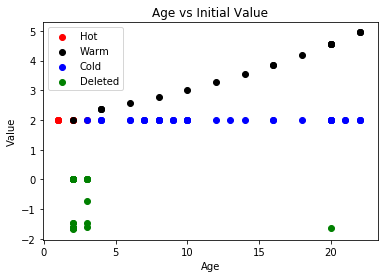

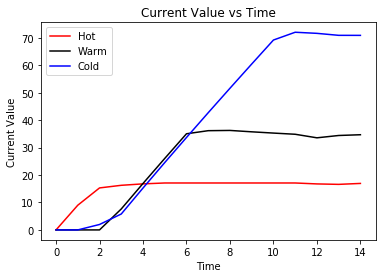

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [nan, 0.0], [nan, 0.0], [nan, 0.0], [nan, 0.0], [nan, 0.0], [nan, 0.0], [nan, 0.0], [nan, 0.0], [nan, 0.0], [2.0, 0.0], [2.0, 0.0], [3.0, 0.0], [3.0, 0.0], [3.0, 0.0], [2.0, 0.0], [2.0, 0.0], [3.0, 0.0], [3.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 1.62], [2.0, 1.62], [2.0, 1.62], [2.0, 1.6523372476711733], [2.0, 1.62], [2.0, 1.62], [2.0, 1.62], [20.0, 1.6358138751944615], [3.0, 0.7169718448170838], [2.0, 1.4580000000000002], [2.0, 1.62], [2.0, 1.62], [3.0, 1.6032611790780917], [3.0, 1.4580000000000002], [2.0, 1.4580000000000002], [2.0, 1.6194557364425168], [2.0, 1.6194557364425168]]


In [17]:
# This cell can be run repeatedly to import new batches from a bro file

# New batch of 5 lines, here represented by 5 random values
batch = pd.read_csv("dns.log",header = 0)
vals = pd.DataFrame(np.ones((5,3)),columns=['Age','Key Terrain','Queries'])
vals['Age'] = 0
val_tot = np.zeros(5)
rplan = np.hstack((np.mgrid[0:5, 1:4][1],np.zeros(5).reshape(-1,1)))
ind = np.zeros(5)
loop += 5
db = dataBatch(batch,vals,val_tot,ind,rplan)

toy_agents.batch_load(env, db, 100)
t += 1
env.render(out=0)
clr = ['r','k','b']
sub = plt.subplot()
sub.set_title('Current Value vs Time')
sub.set_xlabel('Time')
sub.set_ylabel('Current Value')
for i in np.arange(env.num_ds):
    vals_plot[i].append(sum(env.ds[env.names[i+1]].dataBatch.get('val_tot')))
    sub.plot(np.arange(t+1),vals_plot[i], c = clr[i], label = env.names[i+1])

sub.legend(loc=2)
plt.show()

#env.render(out=1)
print(env.del_val)

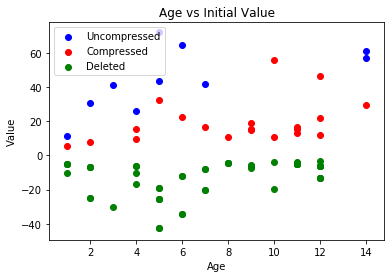

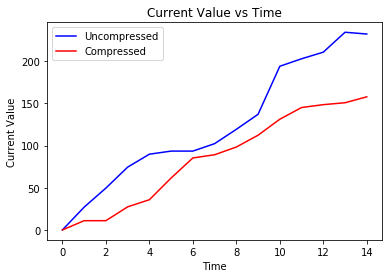

Uncompressed Database:
                  uid                                   src  sport   age  \
0   CghXHv4P9sybq1dnL                       192.168.202.100  45658  14.0   
1   CTySHd36MODzjqHEh                        192.168.202.76    137  14.0   
2    CP0GkVYOcUStxcH8                        192.168.202.89    137   3.0   
3  CwGoWM18B7jZYEcjvi                        192.168.202.77    137   5.0   
4   CT6ScvybqNfoWT8Eg                        192.168.202.76    137   2.0   
5  Cfmlu52EOuSovdrpj2                        192.168.202.89  57144   4.0   
6    CFHwOcUAkavh7LyG                        192.168.202.71    137   5.0   
7    CFHwOcUAkavh7LyG                        192.168.202.71    137   7.0   
8    CFHwOcUAkavh7LyG                        192.168.202.71    137   6.0   
9  CaaGYj1xT7ljjZgHo3  2001:dbb:c18:202:f2de:f1ff:fe9b:ad6a   5353   1.0   

       value  
0  60.962381  
1  57.251938  
2  41.543705  
3  43.387131  
4  30.865787  
5  25.819568  
6  72.150793  
7  42.105430  
8  64

0

In [40]:
# This cell can be run repeatedly to import new batches from a bro file

# New batch of 5 lines, here represented by 5 random values
batch = pandas.read_csv("dns.log", header=loop)
values = np.random.exponential([10.0, 10.0, 10.0, 10.0, 10.0])
loop += 5

toy_agents.batch_load(env, batch, values, 100)

vals = np.vstack((vals, np.array([np.sum(env.values0_init[:,1]),np.sum(env.values1_init[:,1])])))
t += 1

env.render(out=0)

sub = plt.subplot()
sub.plot(np.arange(t+1),vals[:,0], c = 'b', label = 'Uncompressed')
sub.plot(np.arange(t+1),vals[:,1], c = 'r', label = 'Compressed')
sub.set_title('Current Value vs Time')
sub.set_xlabel('Time')
sub.set_ylabel('Current Value')
sub.legend(loc=2)
plt.show()

env.render(out=1)